### Recommendation system for e-commerce platform

یک سیستم توصیه‌گر به خوبی توسعه یافته می‌تواند به کسب‌وکارها کمک کند تا تجربه خرید مشتریان را در وب‌سایت بهبود بخشند و در نتیجه به بهبود جذب و نگهداری مشتریان منجر شود.

سیستم توصیه‌گری که در زیر طراحی شده است، بر اساس سفر یک مشتری جدید از زمانی که برای اولین بار به وب‌سایت کسب‌وکار وارد می‌شود تا زمان خریدهای مکرر او طراحی شده است.

این سیستم توصیه‌گر در ۳ بخش بر اساس زمینه کسب‌وکار طراحی شده است:

#### بخش اول سیستم توصیه‌گر: سیستم مبتنی بر محبوبیت محصولات برای مشتریان جدید

#### بخش دوم سیستم توصیه‌گر: سیستم فیلترینگ مشارکتی مبتنی بر مدل که بر اساس تاریخچه خرید مشتری و امتیازاتی که کاربران دیگر برای اقلام مشابه داده‌اند، عمل می‌کند.

#### بخش سوم سیستم توصیه‌گر: زمانی که یک کسب‌وکار برای اولین بار وب‌سایت تجارت الکترونیک خود را راه‌اندازی می‌کند بدون هیچ‌گونه امتیازدهی محصول.

زمانی که یک مشتری جدید بدون هیچ‌گونه تاریخچه خرید قبلی به وب‌سایت تجارت الکترونیک وارد می‌شود، به او محبوب‌ترین محصولات فروخته شده در وب‌سایت شرکت توصیه می‌شود. پس از اینکه او یک خرید انجام داد، سیستم توصیه‌گر به‌روزرسانی می‌شود و محصولات دیگری را بر اساس تاریخچه خرید و امتیازاتی که کاربران دیگر در وب‌سایت ارائه داده‌اند، توصیه می‌کند. این بخش با استفاده از تکنیک‌های فیلترینگ مشارکتی انجام می‌شود.

## Recommendation System - Part I

### سیستم توصیه‌گر مبتنی بر محبوبیت محصول که به مشتریان جدید هدف‌گذاری شده است

استراتژی مبتنی بر محبوبیت، رویکردی عالی برای هدف قرار دادن مشتریان جدید با محبوب‌ترین محصولاتی است که در وب‌سایت یک کسب‌وکار فروخته می‌شود و برای راه‌اندازی اولیه یک موتور توصیه‌گر بسیار مفید است.

#### Importing libraries

In [ ]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

# %matplotlib inline
plt.style.use("ggplot")


#### Loading the dataset

In [55]:
amazon_ratings = pd.read_csv('../DataSets/ratings_Beauty.csv')
amazon_ratings = amazon_ratings.dropna()
amazon_ratings.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [56]:
amazon_ratings.shape

(2023070, 4)

In [57]:
popular_products = pd.DataFrame(amazon_ratings.groupby('ProductId')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending=False)
most_popular.head(10)

,Rating
ProductId,
B001MA0QY2,7533
B0009V1YR8,2869
B0043OYFKU,2477
B0000YUXI0,2143
B003V265QW,2088
B000ZMBSPE,2041
B003BQ6QXK,1918
B004OHQR1Q,1885
B00121UVU0,1838


<Axes: xlabel='ProductId'>

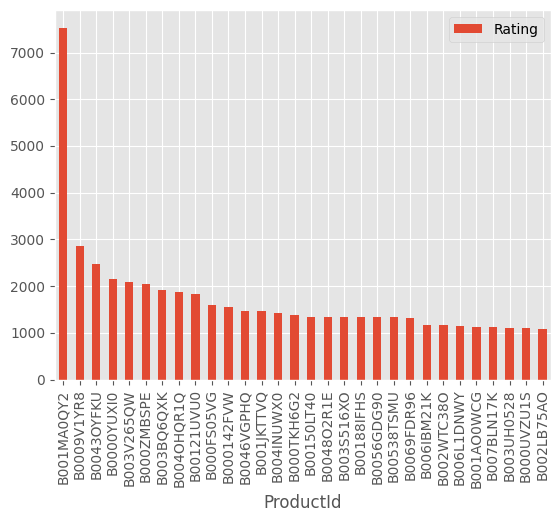

In [58]:
most_popular.head(30).plot(kind = "bar")

##### تحلیل:

نمودار بالا به ما محبوب‌ترین محصولات (ترتیب شده به صورت نزولی) فروخته شده توسط کسب‌وکار را نشان می‌دهد.

به عنوان مثال، محصول با شناسه # B001MA0QY2 بیش از 7000 فروش داشته است و محصول بعدی با شناسه # B0009V1YR8 دارای 3000 فروش است و غیره.

## Recommendation System - Part II

سیستم فیلترینگ مشارکتی مبتنی بر مدل

این سیستم به کاربران اقلامی را توصیه می‌کند که بر اساس تاریخچه خرید و شباهت امتیازاتی که کاربران دیگر برای اقلام مشابه داده‌اند، با امتیازاتی که یک مشتری خاص ارائه کرده است، مطابقت دارد.

به عبارت دیگر، این روش از داده‌های خرید و نظرات کاربران دیگر استفاده می‌کند تا اقلامی را که احتمالاً برای یک کاربر خاص جذاب هستند، شناسایی و پیشنهاد کند. این سیستم می‌تواند به بهبود تجربه خرید و افزایش رضایت مشتری کمک کند.

### سیستم فیلترینگ مشارکتی مبتنی بر مدل

این سیستم به کاربران اقلامی را توصیه می‌کند که بر اساس تاریخچه خرید و شباهت امتیازاتی که کاربران دیگر برای اقلام مشابه ارائه داده‌اند، با امتیازات یک مشتری خاص مطابقت دارد.

یک تکنیک فیلترینگ مشارکتی مبتنی بر مدل در اینجا انتخاب شده است، زیرا این روش در پیش‌بینی محصولات برای یک کاربر خاص کمک می‌کند با شناسایی الگوهایی بر اساس ترجیحات از داده‌های چندین کاربر.

#### ماتریس کاربردی بر اساس محصولات فروخته شده و نظرات کاربران

ماتریس کاربردی یک ابزار کلیدی در سیستم‌های فیلترینگ مشارکتی است که برای تجزیه و تحلیل و مدل‌سازی داده‌ها استفاده می‌شود. این ماتریس معمولاً شامل اطلاعاتی است که نشان می‌دهد کاربران مختلف چگونه به محصولات مختلف امتیاز داده‌اند یا چه نظراتی درباره آن‌ها ارائه کرده‌اند. 

در این ماتریس:

- **ردیف‌ها** نمایانگر کاربران هستند.
- **ستون‌ها** نمایانگر محصولات هستند.
- **مقدار هر سلول** نشان‌دهنده امتیاز یا نظر کاربر مربوطه نسبت به محصول مشخص است.

با استفاده از این ماتریس، می‌توان الگوهای خرید را شناسایی کرد و به کاربران محصولات جدیدی را بر اساس ترجیحات و رفتار خرید سایر کاربران مشابه پیشنهاد داد. این روش به بهبود دقت توصیه‌ها و افزایش رضایت مشتریان کمک می‌کند.

Utility Matrix

یک ماتریس کاربردی شامل تمام جزئیات ترجیحات کاربران نسبت به اقلام (امتیازات) به‌صورت یک ماتریس است. ماتریس کاربردی معمولاًSparse (کمیاب) است، زیرا هیچ‌یک از کاربران تمامی اقلام موجود در لیست را خریداری نمی‌کنند؛ بنابراین، اکثر مقادیر ناشناخته باقی می‌مانند.

به عبارت دیگر، در یک ماتریس کاربردی، بسیاری از سلول‌ها که نمایانگر امتیاز کاربران نسبت به اقلام هستند، خالی یا صفر خواهند بود. این ویژگی چالش‌هایی را در تحلیل داده‌ها و الگوریتم‌های توصیه‌گر ایجاد می‌کند، زیرا باید از روش‌های خاصی برای پیش‌بینی این مقادیر ناشناخته استفاده کرد. سیستم‌های فیلترینگ مشارکتی معمولاً از تکنیک‌های مختلفی مانند تخمین امتیازها و شناسایی الگوهای مشابه در داده‌های موجود برای پر کردن این خلاها استفاده می‌کنند.

In [59]:
# Subset of Amazon Ratings

amazon_ratings1 = amazon_ratings.head(10000)

In [60]:
ratings_utility_matrix = amazon_ratings1.pivot_table(values='Rating', index='UserId', columns='ProductId', fill_value=0)
ratings_utility_matrix.head()

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A024581134CV80ZBLIZTZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A03056581JJIOL5FSKJY7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A03099101ZRK4K607JVHH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0505229A7NSH3FRXRR4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


به‌طور پیش‌بینی‌شده، ماتریس کارایی به‌دست‌آمده در بالا پراکنده است و من مقادیر ناشناخته را با 0 پر کرده‌ام.

In [61]:
ratings_utility_matrix.shape

(9697, 886)

Transposing the matrix

In [62]:
X = ratings_utility_matrix.T
X.head()

UserId,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,A059547920Q3LZVFHLPI3,A07410232KYRFR25CIUGJ,A082796624UNM47DSAI6K,A0864963DOAY7LXGS5I6,...,AZW1HXXYAC15B,AZWRTJPN7NXT,AZWTXHXZXFAYP,AZYQEFB9Y5N22,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0558925278,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0733001998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0737104473,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0762451459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
X.shape

(886, 9697)

Unique products in subset of data

In [64]:
X1 = X

### Decomposing the Matrix

In [65]:
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(886, 10)

### Correlation Matrix

In [66]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(886, 886)

correlation_matrix

### جداسازی شناسه محصول # 6117036094 از ماتریس همبستگی

اگر فرض کنیم که یک مشتری محصول با شناسه # 6117036094 (که به‌صورت تصادفی انتخاب شده است) را خریداری می‌کند.

In [67]:
X.index[99]

'6117036094'

شاخص شماره محصول خریداری‌شده توسط مشتری

In [68]:
i = "6117036094"

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

99

همبستگی برای تمام اقلام با محصولی که توسط این مشتری خریداری شده است، بر اساس اقلامی که توسط سایر مشتریانی که همان محصول را خریداری کرده‌اند، امتیازدهی شده است.

In [69]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(886,)

### پیشنهاد 10 محصول با بالاترین همبستگی به ترتیب

In [70]:
Recommend = list(X.index[correlation_product_ID > 0.90])

# Removes the item already bought by the customer
Recommend.remove(i) 

Recommend[0:9]

['0733001998',
 '0762451459',
 '1304139220',
 '130414089X',
 '130414674X',
 '1304174778',
 '1304196046',
 '1304196062',
 '1304196135']

Product Id #

در اینجا 10 محصول برتر که باید توسط سیستم توصیه به مشتری فوق نمایش داده شود، بر اساس تاریخچه خرید سایر مشتریان در وب‌سایت آورده شده است.

## Recommendation System - Part III

برای یک کسب‌وکار بدون هیچ‌گونه تاریخچه خرید کاربر-محصول، می‌توان یک سیستم توصیه‌گر مبتنی بر موتور جستجو برای کاربران طراحی کرد. توصیه‌های محصولات می‌تواند بر اساس تحلیل خوشه‌بندی متنی ارائه‌شده در توضیحات محصول باشد.

In [71]:
# Importing libraries

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

### سیستم توصیه‌گر مبتنی بر محصول به محصول بر اساس توضیحات محصول

این سیستم زمانی کاربرد دارد که کسب‌وکار برای اولین بار در حال راه‌اندازی وب‌سایت تجارت الکترونیکی خود است.

In [72]:
product_descriptions = pd.read_csv('../DataSets/product_descriptions.csv')
product_descriptions.shape

(124428, 2)

#### بررسی مقادیر گمشده

In [73]:
# Missing values

product_descriptions = product_descriptions.dropna()
product_descriptions.shape
product_descriptions.head()

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [74]:
product_descriptions1 = product_descriptions.head(500)
# product_descriptions1.iloc[:,1]

product_descriptions1["product_description"].head(10)

0    Not only do angles make joints stronger, they ...
1    BEHR Premium Textured DECKOVER is an innovativ...
2    Classic architecture meets contemporary design...
3    The Grape Solar 265-Watt Polycrystalline PV So...
4    Update your bathroom with the Delta Vero Singl...
5    Achieving delicious results is almost effortle...
6    The Quantum Adjustable 2-Light LED Black Emerg...
7    The Teks #10 x 1-1/2 in. Zinc-Plated Steel Was...
8    Get the House of Fara 3/4 in. x 3 in. x 8 ft. ...
9    Valley View Industries Metal Stakes (4-Pack) a...
Name: product_description, dtype: object

#### استخراج ویژگی از توصیفات محصول

تبدیل متن موجود در توصیف محصول به داده‌های عددی برای تحلیل

In [75]:
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(product_descriptions1["product_description"])
X1

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 34817 stored elements and shape (500, 8932)>

#### تجسم خوشه‌های محصولات در زیرمجموعه‌ای از داده‌ها

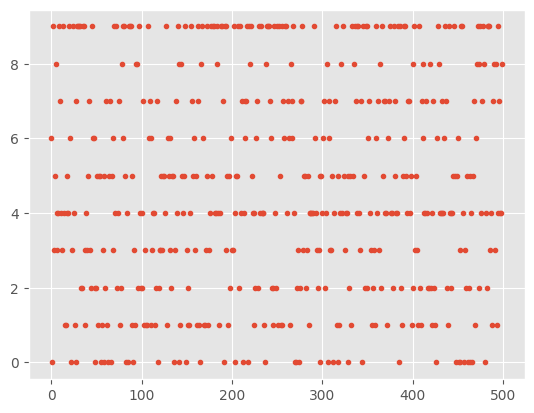

In [76]:
# Fitting K-Means to the dataset

X=X1

kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()


#### کلمات برتر در هر خوشه بر اساس توصیف محصول

In [77]:
# # Optimal clusters is 

true_k = 10

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print



Top terms per cluster:
Cluster 0:
 toilet
 water
 tank
 flush
 bowl
 gal
 nozzle
 sprayer
 seat
 piece
Cluster 1:
 sheet
 landscape
 tile
 wall
 products
 commercial
 high
 recommended
 indoor
 piece
Cluster 2:
 air
 light
 power
 use
 ft
 easy
 water
 unit
 control
 installation
Cluster 3:
 nickel
 collection
 cabinet
 bronze
 finish
 vanity
 center
 design
 kitchen
 hardware
Cluster 4:
 wood
 door
 painted
 concrete
 ft
 moulding
 product
 vary
 proposition
 nbsp
Cluster 5:
 wall
 plate
 posts
 post
 connect
 speaker
 design
 wire
 non
 mounting
Cluster 6:
 frame
 patio
 fabric
 steel
 dining
 outdoor
 cushions
 canopy
 wicker
 durable
Cluster 7:
 insulation
 ladder
 cover
 attic
 water
 easy
 fiberglass
 energy
 ft
 box
Cluster 8:
 easy
 cooking
 door
 oven
 cycle
 cu
 ft
 wash
 capacity
 piece
Cluster 9:
 metal
 steel
 20
 gauge
 drill
 screw
 use
 screws
 hole
 light


#### پیش‌بینی خوشه‌ها بر اساس کلمات کلیدی جستجو

cutting tool

In [78]:
print("Cluster ID:")
Y = vectorizer.transform(["cutting tool"])
prediction = model.predict(Y)
print(prediction)

Cluster ID:
[9]


spray paint

In [79]:
print("Cluster ID:")
Y = vectorizer.transform(["spray paint"])
prediction = model.predict(Y)
print(prediction)

Cluster ID:
[7]


steel drill

In [80]:
print("Cluster ID:")
Y = vectorizer.transform(["steel drill"])
prediction = model.predict(Y)
print(prediction)

Cluster ID:
[9]


در صورتی که یک کلمه در چندین خوشه ظاهر شود، الگوریتم خوشه‌ای را انتخاب می‌کند که بالاترین فراوانی وقوع آن کلمه را دارد.

water

In [81]:
print("Cluster ID:")
Y = vectorizer.transform(["water"])
prediction = model.predict(Y)
print(prediction)

Cluster ID:
[0]


زمانی که یک خوشه بر اساس کلمات جستجوی کاربر شناسایی شد، سیستم توصیه‌گر می‌تواند اقلامی را از خوشه‌های محصول مربوطه بر اساس توضیحات محصول نمایش دهد.

#### خلاصه:

این روش بهترین نتیجه را زمانی به دست می‌آورد که یک کسب‌وکار برای اولین بار در حال راه‌اندازی وب‌سایت تجارت الکترونیک خود باشد و در ابتدا داده‌های خرید/رتبه‌بندی کاربران و اقلام را نداشته باشد. این سیستم توصیه‌گر به کاربران کمک می‌کند تا با توصیه‌های خوبی شروع کنند و هنگامی که خریداران تاریخچه خریدی داشته باشند، موتور توصیه می‌تواند از تکنیک فیلترگذاری مبتنی بر مدل برای همکاری استفاده کند.